In [ ]:
import pandas as pd

df_defect = pd.read_csv('./20250428_tabPressData/20250428_142806_defect.csv')
df_normal = pd.read_csv('./20250428_tabPressData/20250428_162113_normal.csv')

In [54]:
# Use plotly to plot df_defect

import plotly.express as px

df_tmp = df_defect[['timeStamp', 'actualTime(ms)', 'compr2Data']].iloc[:10000]

fig = px.scatter(df_tmp, x='timeStamp', y='compr2Data', title='Defect Data')
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='Defect Data', xaxis_title='X Coordinate', yaxis_title='Y Coordinate')
fig.show()

In [57]:

df_tmp2 = df_normal[['timeStamp', 'actualTime(ms)', 'compr2Data']].iloc[:10000]

fig = px.scatter(df_tmp2, x='timeStamp', y='compr2Data', title='Normal Data')
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='Normal Data', xaxis_title='X Coordinate', yaxis_title='Y Coordinate')
fig.show()

In [ ]:
# Apply stl to df_tmp2

from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

df_tmp2['timeStamp'] = pd.to_datetime(df_tmp2['timeStamp'], unit='ms')
df_tmp2.set_index('timeStamp', inplace=True)

x



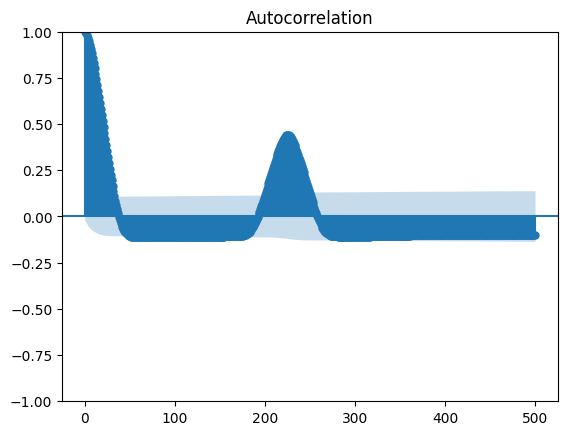

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df_tmp2['compr2Data'], lags=500)
plt.show()

In [45]:
df = df_normal[['timeStamp', 'actualTime(ms)', 'compr2Data', 'ejectData']]
df['actualTime(ms)'] = pd.to_datetime(df['actualTime(ms)'])

# Remove the dates
# df['actualTime(ms)'] = df['actualTime(ms)'].dt.strftime('%H:%M:%S:%f')

# df_normal

# Get the rolling mean of 
df['compr2Data'] = df['compr2Data'].rolling(window=10).mean()

ROLLING_WINDOW = 50
df['compr2Data'] = df['compr2Data'].rolling(window=ROLLING_WINDOW).mean()

# Remove the first 10 rows
df = df.iloc[ROLLING_WINDOW:]

df = df.iloc[0:5000]

/var/folders/_l/c5x6tzmd2md135n0v0l331xm0000gn/T/ipykernel_4878/4162121687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actualTime(ms)'] = pd.to_datetime(df['actualTime(ms)'])
/var/folders/_l/c5x6tzmd2md135n0v0l331xm0000gn/T/ipykernel_4878/4162121687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compr2Data'] = df['compr2Data'].rolling(window=10).mean()
/var/folders/_l/c5x6tzmd2md135n0v0l331xm0000gn/T/ipykernel_4878/4162121687.py:13: SettingWithCopyWarning: 
A value is trying to be set 

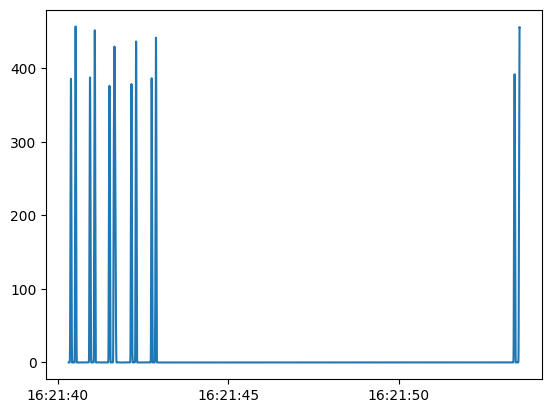

In [46]:
# Plot df

import matplotlib.pyplot as plt

plt.plot(df['actualTime(ms)'], df['compr2Data'], label='compr2Data')

In [ ]:
# Sort the DataFrame by 'actualTime(ms)' in ascending order
df_normal = df_normal.sort_values(by='actualTime(ms)')


# Set the datetime column as the index
df_normal.set_index('actualTime(ms)', inplace=True)

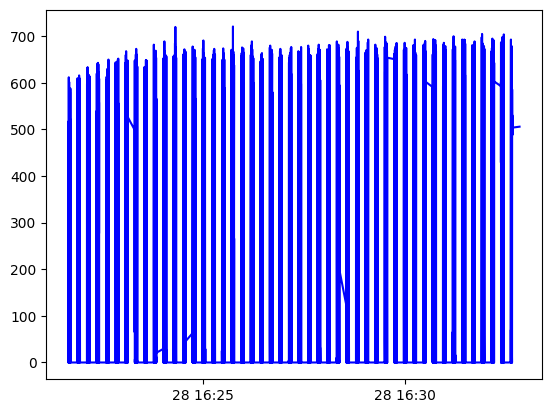

In [ ]:

# Plot the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


plt.plot(df_normal.index, df_normal['compr2Data'], label='compr2Data', color='blue')

In [43]:
prev = time.time()

In [ ]:
import time


now = time.time()

print("Time taken to plot: ", now - prev)

1747288779.4755142